In [1]:
from keras import layers, models
from sklearn import preprocessing
from keras.models import Model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import tensorflow.keras as tk
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

Using TensorFlow backend.
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [20]:
df = pd.read_csv('./data/data.csv')
df.head(3)

,YM,M_10,M_20,M_30,M_40,M_50,M_60,M_70,M_80,F_10,F_20,F_30,F_40,F_50,F_60,F_70,F_80
0,201101,20055,57511,63426,109815,123668,80658,26896,6368,18554,56586,90068,75919,75133,55318,19640,5410
1,201102,18444,33012,54383,103162,109919,73798,26203,5879,17529,34433,79658,66642,59621,52168,20212,5359
2,201103,8430,8115,41100,103781,96896,63894,27747,6196,8141,7785,53713,48062,39323,56353,26444,5534


In [3]:
X_M10 = df[['M_60', 'F_20', 'F_40', 'F_60', 'F_70', 'F_80']]
y_M10 = df[['M_10']]

In [4]:
print(type(X_M10), type(y_M10))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [5]:
scaler = preprocessing.MinMaxScaler()
X_M10 = scaler.fit_transform(X_M10)

In [6]:
X_M10[0]

array([0.17356931, 0.39415086, 0.2060368 , 0.11858045, 0.03803253,
       0.06015073])

In [7]:
model = Sequential()
model.add(Dense(1, input_dim=6, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X_M10, y_M10, epochs=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
108/108 [==============================] - 0s 2ms/sample - loss: 1320994432.0000 - mean_squared_error: 1320994432.0000
Epoch 2/500
108/108 [==============================] - 0s 65us/sample - loss: 1316865711.4074 - mean_squared_error: 1316865664.0000
Epoch 3/500
108/108 [==============================] - 0s 74us/sample - loss: 1312671971.5556 - mean_squared_error: 1312672000.0000
Epoch 4/500
108/108 [==============================] - 0s 83us/sample - loss: 1308697258.6667 - mean_squared_error: 1308697216.0000
Epoch 5/500
108/108 [==============================] - 0s 74us/sample - loss: 1304742324.1481 - mean_squared_error: 1304742272.0000
Epoch 6/500
108/108 [==============================] - 0s 74us/sample - loss: 1300718155.8519 - mean_squared_error: 1300718208.0000
Epoch 7/500
108/108 [====================

In [30]:
model.save('./MachineModel/AirplanCustom/Man10Model.h5')

In [18]:
y_M10Pre = model.predict(X_M10)
y_M10Predf = pd.DataFrame(y_M10Pre, columns=['M_10_pre'])
y_M10Predf.head(5)

,M_10_pre
0,13213.638672
1,11892.339844
2,10477.009766
3,10525.260742
4,12091.774414


In [19]:
y_M10['M_10_pre'] = y_M10Predf['M_10_pre']
y_M10.head(3)

c:\Users\lunaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,M_10,M_10_pre,오차율
0,20055,13213.638672,34.112996
1,18444,11892.339844,35.521905
2,8430,10477.009766,24.282441


In [21]:
# 숫자형 날짜 다시 넣어주기
df['YM'] = df['YM'].astype(str)
df['YM'] = pd.to_datetime(df['YM'], format='%Y%m')
df.head(3)

,YM,M_10,M_20,M_30,M_40,M_50,M_60,M_70,M_80,F_10,F_20,F_30,F_40,F_50,F_60,F_70,F_80
0,2011-01-01,20055,57511,63426,109815,123668,80658,26896,6368,18554,56586,90068,75919,75133,55318,19640,5410
1,2011-02-01,18444,33012,54383,103162,109919,73798,26203,5879,17529,34433,79658,66642,59621,52168,20212,5359
2,2011-03-01,8430,8115,41100,103781,96896,63894,27747,6196,8141,7785,53713,48062,39323,56353,26444,5534


c:\Users\lunaw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lunaw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lunaw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


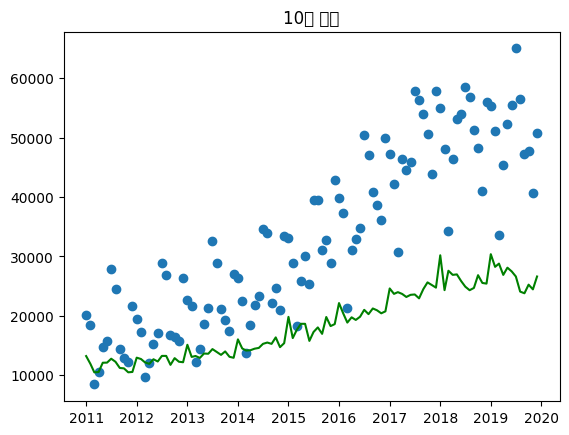

In [22]:
plt.scatter(df.YM, df.M_10, marker='o')
plt.plot(df.YM, y_M10['M_10_pre'], 'g-')
plt.title('10대 남자')
plt.show()

In [13]:
y_M10['오차율'] = abs((y_M10['M_10_pre'] - y_M10['M_10']) / y_M10['M_10'] * 100)
y_M10.head(3)

c:\Users\lunaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,M_10,M_10_pre,오차율
0,20055,13213.638672,34.112996
1,18444,11892.339844,35.521905
2,8430,10477.009766,24.282441


In [24]:
print("남자 10대 평균오차율: ", y_M10['오차율'].mean())

남자 10대 평균오차율:  39.24170713216732


In [ ]:
MenModel = keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/data/Man10Model.h5')

In [ ]:
MenModel.predict(X_M10)

In [32]:
X_F50 = df[['M_50', 'M_60', 'M_70', 'F_10', 'F_40', 'F_70']]
y_F50 = df[['F_50']]

In [33]:
print(type(X_F50), type(y_F50))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [34]:
scaler = preprocessing.MinMaxScaler()
X_F50 = scaler.fit_transform(X_F50)

In [35]:
model = Sequential()
model.add(Dense(1, input_dim=6, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X_F50, y_F50, epochs=500)

Epoch 1/500
108/108 [==============================] - 0s 793us/sample - loss: 10119438753.1852 - mean_squared_error: 10119438336.0000
Epoch 2/500
108/108 [==============================] - 0s 83us/sample - loss: 10085615843.5556 - mean_squared_error: 10085615616.0000
Epoch 3/500
108/108 [==============================] - 0s 83us/sample - loss: 10053836344.8889 - mean_squared_error: 10053836800.0000
Epoch 4/500
108/108 [==============================] - 0s 83us/sample - loss: 10021105284.7407 - mean_squared_error: 10021105664.0000
Epoch 5/500
108/108 [==============================] - 0s 65us/sample - loss: 9988216016.5926 - mean_squared_error: 9988215808.0000
Epoch 6/500
108/108 [==============================] - 0s 74us/sample - loss: 9956233064.2963 - mean_squared_error: 9956233216.0000
Epoch 7/500
108/108 [==============================] - 0s 74us/sample - loss: 9920914659.5556 - mean_squared_error: 9920914432.0000
Epoch 8/500
108/108 [==============================] - 0s 74us/samp

In [36]:
model.save('./MachineModel/AirplanCustom/Women50Model.h5')

In [37]:
y_F50Pre = model.predict(X_F50)
y_F50Predf = pd.DataFrame(y_F50Pre, columns=['F_50_pre'])
y_F50['F_50_pre'] = y_F50Predf['F_50_pre']
y_F50.head(3)

c:\Users\lunaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,F_50,F_50_pre
0,75133,36864.910156
1,59621,33556.101562
2,39323,27961.300781


c:\Users\lunaw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lunaw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lunaw\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


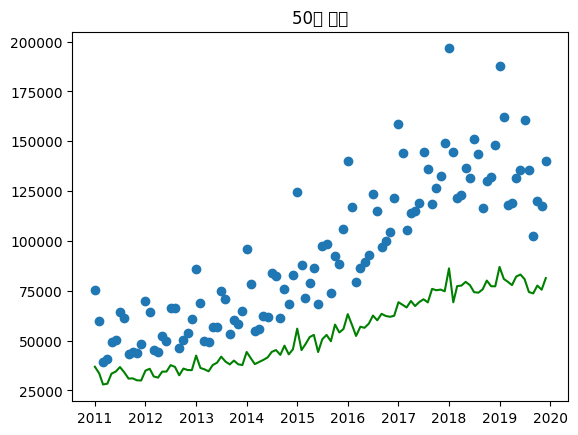

In [38]:
plt.scatter(df.YM, df.F_50, marker='o')
plt.plot(df.YM, y_F50['F_50_pre'], 'g-')
plt.title('50대 여자')
plt.show()

In [39]:
y_F50['오차율'] = abs((y_F50['F_50_pre'] - y_F50['F_50']) / y_F50['F_50'] * 100)
y_F50.head(3)

c:\Users\lunaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,F_50,F_50_pre,오차율
0,75133,36864.910156,50.933797
1,59621,33556.101562,43.717647
2,39323,27961.300781,28.893267


In [40]:
print("여자 50대 평균오차율: ", y_F50['오차율'].mean())

여자 50대 평균오차율:  40.21346585520337


In [ ]:
WomenModel = keras.models.load_model(
    './MachineModel/AirplanCustom/Women50Model.h5')

In [ ]:
WomenModel.predict(X_F50)

In [ ]:
y_F50.head()

<pre>2000번 돌리면 정확도가 올라감...</pre>